45.55873015873011


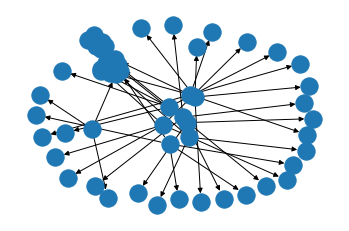

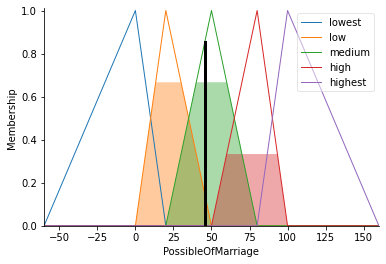

In [4]:

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions and variables
AgeOfPerson = ctrl.Antecedent(np.arange(16, 51, 1), 'AgeOfPerson')
AgeDifference = ctrl.Antecedent(np.arange(0, 51, 1), 'AgeDifference')
LevelOfAgreementHavingKids = ctrl.Antecedent(np.arange(0, 11, 1), 'LevelOfAgreementHavingKids')
PriorKids = ctrl.Antecedent(np.arange(0, 11, 1), 'PriorKids')
TotalIncome = ctrl.Antecedent(np.arange(0, 150001, 1), 'TotalIncome')
TotalAssets = ctrl.Antecedent(np.arange(-300000, 300001, 1), 'TotalAssets')
YearsOfRelation = ctrl.Antecedent(np.arange(0, 8, 1), 'YearsOfRelation')
PreMarriageNum = ctrl.Antecedent(np.arange(0, 11, 1), 'PreMarriageNum')
EffectiveCommunication = ctrl.Antecedent(np.arange(0, 11, 1), 'EffectiveCommunication')
CommonValues = ctrl.Antecedent(np.arange(0, 11, 1), 'CommonValues')
LongDistanceRelation = ctrl.Antecedent(np.arange(0, 366, 1), 'LongDistanceRelation')
EducationLevel = ctrl.Antecedent(np.arange(0, 11, 1), 'EducationLevel')
FamilyStatus = ctrl.Antecedent(np.arange(0, 11, 1), 'FamilyStatus')

PossibleOfMarriage = ctrl.Consequent(np.arange(-60, 161, 1), 'PossibleOfMarriage')

# Auto-membership function population is possible with .automf(3, 5, or 7)
AgeOfPerson.automf(5,'quant')
AgeDifference.automf(5,'quant')
LevelOfAgreementHavingKids.automf(5,'quant')
PriorKids.automf(3,'quant')
TotalIncome.automf(5,'quant')
TotalAssets.automf(5,'quant')
YearsOfRelation.automf(5,'quant')
PreMarriageNum.automf(3,'quant')
EffectiveCommunication.automf(3,'quant')
CommonValues.automf(5,'quant')
LongDistanceRelation.automf(5,'quant')
EducationLevel.automf(5,'quant')
FamilyStatus.automf(5,'quant')
# Custom membership functions can be built interactively with a familiar,
# Pythonic API
PossibleOfMarriage['lowest'] = fuzz.trimf(PossibleOfMarriage.universe, [-60, 0, 20])
PossibleOfMarriage['low'] = fuzz.trimf(PossibleOfMarriage.universe, [0, 20, 50])
PossibleOfMarriage['medium'] = fuzz.trimf(PossibleOfMarriage.universe, [20,50, 80])
PossibleOfMarriage['high'] = fuzz.trimf(PossibleOfMarriage.universe, [50, 80, 100])
PossibleOfMarriage['highest'] = fuzz.trimf(PossibleOfMarriage.universe, [80, 100, 160])

# You can see how these look with .view()
# AgeOfPerson.view()
# AgeDifference.view()
# LevelOfAgreementHavingKids.view()
# PriorKids.view()
# TotalIncome.view()
# TotalAssets.view()
# YearsOfRelation.view()
# PreMarriageNum.view()
# EffectiveCommunication.view()
# CommonValues.view()
# LongDistanceRelation.view()
# EducationLevel.view()
# FamilyStatus.view()

# PossibleOfMarriage.view()

#fuzzy rules
rule1 = ctrl.Rule(LevelOfAgreementHavingKids['lower'] & \
                  (TotalIncome['lower'] | TotalAssets['lower']) & \
                  PriorKids['high'] & \
                  PreMarriageNum['high'] & \
                  EducationLevel['lower'] &\
                  EffectiveCommunication['low'] &\
                  CommonValues['lower'] &\
                  FamilyStatus['lower'] \
                  , PossibleOfMarriage['lowest'])
rule2 = ctrl.Rule(AgeOfPerson['lower'] | \
                  (AgeDifference['high'] | AgeDifference['higher']) | \
                  ((PreMarriageNum['average'] | PreMarriageNum['high']) | PriorKids['high']) | \
                  YearsOfRelation['lower'] | \
                  (TotalIncome['low'] | TotalIncome['lower'] | TotalAssets['low'] | TotalAssets['lower']) | \
                  LongDistanceRelation['average'] | LongDistanceRelation['high'] | LongDistanceRelation['higher'] | \
                  EffectiveCommunication['low'] |\
                  LevelOfAgreementHavingKids['low'] |\
                  (CommonValues['lower'] | CommonValues['low']) |\
                  FamilyStatus['low']|FamilyStatus['lower'] \
                  , PossibleOfMarriage['low'])
rule3 = ctrl.Rule((AgeDifference['average']) | \
                  (LevelOfAgreementHavingKids['low'] | LevelOfAgreementHavingKids['average']) | \
                  (CommonValues['low'] | CommonValues['average']) | \
                  (TotalIncome['low'] | TotalAssets['low']) | \
                  (EffectiveCommunication['average']) | \
                  FamilyStatus['average'] \
                  , PossibleOfMarriage['medium'])
rule4 = ctrl.Rule((AgeOfPerson['low'] | AgeOfPerson['average'] | AgeOfPerson['high'] | AgeOfPerson['higher']) & \
                  (AgeDifference['low'] | AgeDifference['lower']) & \
                  (LevelOfAgreementHavingKids['high'] | LevelOfAgreementHavingKids['higher']) & \
                  (TotalIncome['average'] | TotalIncome['high'] | TotalIncome['higher']) & (TotalAssets['low'] | TotalAssets['average'] |TotalAssets['high'] | TotalAssets['higher']) & \
                  (YearsOfRelation['low'] | YearsOfRelation['average'] | YearsOfRelation['high'] | YearsOfRelation['higher']) & \
                  (CommonValues['average'] | CommonValues['high'] | CommonValues['higher']) & \
                  #(LongDistanceRelation['lower'] | LongDistanceRelation['low'] | LongDistanceRelation['average']) &\
                  (EffectiveCommunication['high'] | EffectiveCommunication['average']) & \
                  (FamilyStatus['high'] | FamilyStatus['higher']) \
                  , PossibleOfMarriage['high'])
rule5 = ctrl.Rule((AgeOfPerson['low'] | AgeOfPerson['average'] | AgeOfPerson['high'] | AgeOfPerson['higher']) & \
                  AgeDifference['lower'] & \
                  PreMarriageNum['low'] & \
                  (TotalIncome['high'] | TotalIncome['higher']) & (TotalAssets['high'] | TotalAssets['higher']) & \
                  YearsOfRelation['higher'] & \
                  CommonValues['higher'] & \
                  (LongDistanceRelation['lower'] | LongDistanceRelation['low']) &\
                  EffectiveCommunication['high'] & \
                  FamilyStatus['higher'] \
                  , PossibleOfMarriage['highest'])
# rule1.view()

#calculation
marriage_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4,rule5])
marriaging = ctrl.ControlSystemSimulation(marriage_ctrl)
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)

marriaging.input['AgeOfPerson'] = 30
marriaging.input['AgeDifference'] = 1
marriaging.input['LevelOfAgreementHavingKids'] = 10
marriaging.input['PriorKids'] = 0
marriaging.input['TotalIncome'] = 50000
marriaging.input['TotalAssets'] = 600000
marriaging.input['YearsOfRelation'] = 11
marriaging.input['PreMarriageNum'] = 0
marriaging.input['EffectiveCommunication'] = 8
marriaging.input['CommonValues'] = 6
marriaging.input['LongDistanceRelation'] = 20
marriaging.input['EducationLevel'] = 7
marriaging.input['FamilyStatus'] = 8

# # Crunch the numbers
marriaging.compute()
print (marriaging.output['PossibleOfMarriage'])
PossibleOfMarriage.view(sim=marriaging)

### 